In [65]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver

In [66]:
checkpointer = InMemorySaver()

In [67]:
class Joke(TypedDict):
    topic: str
    joke: str
    explaination: str

In [68]:
graph = StateGraph(Joke)

In [69]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()

model = ChatOpenAI(model='gpt-4o-mini')

def generate_node(state: Joke):
    topic = state['topic']
    prompt = f"Generate a funny joke of one line about the {topic}"

    joke = model.invoke(prompt).content

    return {'joke': joke}

def generate_explaination(state: Joke):
    topic = state['topic']
    joke = state['joke']

    prompt = f"Generate a simple explaination under 2 or 3 sentence of the joke about a topic.\nTopic:{topic}\nJoke:{joke}"

    explaination = model.invoke(prompt).content
    return {'explaination': explaination}

In [70]:
graph.add_node('generate_joke', generate_node)
graph.add_node('generate_explaination', generate_explaination)

In [71]:
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explaination')
graph.add_edge('generate_explaination', END)

In [72]:
workflow = graph.compile(checkpointer=checkpointer)

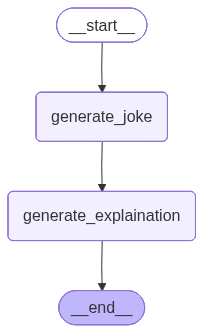

In [73]:
workflow

In [74]:
config = {
    "configurable":
    {
        'thread_id': '1'
    }
}

result = workflow.invoke({
    'topic': 'python'
}, config=config)

result

{'topic': 'python',
 'joke': 'Why do Python programmers prefer dark mode? Because light attracts bugs!',
 'explaination': 'The joke plays on the dual meaning of "bugs." In programming, bugs refer to errors in code, while in real life, light attracts insects known as bugs. Python programmers humorously suggest they use dark mode to avoid attracting these "bugs"—both literal and figurative.'}

In [75]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'python', 'joke': 'Why do Python programmers prefer dark mode? Because light attracts bugs!', 'explaination': 'The joke plays on the dual meaning of "bugs." In programming, bugs refer to errors in code, while in real life, light attracts insects known as bugs. Python programmers humorously suggest they use dark mode to avoid attracting these "bugs"—both literal and figurative.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-d6ef-61bb-8002-1ea0c3940be3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T06:18:33.423873+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-c2e5-667b-8001-701c4ea8eb6f'}}, tasks=(), interrupts=())

In [76]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'python', 'joke': 'Why do Python programmers prefer dark mode? Because light attracts bugs!', 'explaination': 'The joke plays on the dual meaning of "bugs." In programming, bugs refer to errors in code, while in real life, light attracts insects known as bugs. Python programmers humorously suggest they use dark mode to avoid attracting these "bugs"—both literal and figurative.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-d6ef-61bb-8002-1ea0c3940be3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T06:18:33.423873+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-c2e5-667b-8001-701c4ea8eb6f'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'python', 'joke': 'Why do Python programmers prefer dark mode? Because light attracts bugs!'}, next=('generate_explaination',), config={'configurable': {'thread_id

In [77]:
config1 = {
    "configurable":
    {
        'thread_id': '2'
    }
}

result = workflow.invoke({
    'topic': 'javascript'
}, config=config1)

list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'javascript', 'joke': 'Why did the JavaScript developer go broke? Because he kept using "null" as his income!', 'explaination': 'This joke plays on the concept of "null" in JavaScript, which represents an absence of value. The humor comes from the idea that the developer\'s financial situation is as empty as a null value, suggesting he has no income at all.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-f4c0-61e8-8002-45b428b4a4da'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T06:18:36.550371+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-e233-6fb6-8001-c9ee2f793d84'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'javascript', 'joke': 'Why did the JavaScript developer go broke? Because he kept using "null" as his income!'}, next=('generate_explaination',), config={'configurable': {'thread_id':

In [78]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'python', 'joke': 'Why do Python programmers prefer dark mode? Because light attracts bugs!', 'explaination': 'The joke plays on the dual meaning of "bugs." In programming, bugs refer to errors in code, while in real life, light attracts insects known as bugs. Python programmers humorously suggest they use dark mode to avoid attracting these "bugs"—both literal and figurative.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-d6ef-61bb-8002-1ea0c3940be3'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T06:18:33.423873+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-c2e5-667b-8001-701c4ea8eb6f'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'python', 'joke': 'Why do Python programmers prefer dark mode? Because light attracts bugs!'}, next=('generate_explaination',), config={'configurable': {'thread_id

## Updating a state

In [79]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0e7a2d-b60b-64bb-8000-2cb8112b6d7b", "checkpoint_ns": ""}}, {'topic':'java'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0e7a2e-b2db-6512-8001-f35eebd467c7'}}

In [80]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'java'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2e-b2db-6512-8001-f35eebd467c7'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-01-02T06:18:56.484469+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2d-b60b-64bb-8000-2cb8112b6d7b'}}, tasks=(PregelTask(id='322a0033-6c52-f5e0-210b-de489dd3b61e', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'python', 'joke': 'Why do Python programmers prefer dark mode? Because light attracts bugs!', 'explaination': 'The joke plays on the dual meaning of "bugs." In programming, bugs refer to errors in code, while in real life, light attracts insects known as bugs. Python programmers humorously suggest they use dark mode to avoid attracting these "bugs"

In [81]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0e7a2e-b2db-6512-8001-f35eebd467c7"}})

{'topic': 'java',
 'joke': 'Why do Java developers wear glasses? Because they don’t see sharp!',
 'explaination': 'This joke plays on a pun involving programming languages. Java developers "wear glasses" because they "don’t see sharp," referring to C#, a programming language often associated with sharp vision, while jokingly implying that Java developers might need glasses to help them "see" better!'}

In [82]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers wear glasses? Because they don’t see sharp!', 'explaination': 'This joke plays on a pun involving programming languages. Java developers "wear glasses" because they "don’t see sharp," referring to C#, a programming language often associated with sharp vision, while jokingly implying that Java developers might need glasses to help them "see" better!'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2f-8dd6-6b15-8003-af30cdcfead9'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-02T06:19:19.446385+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2f-7818-68b2-8002-b11642d9f370'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers wear glasses? Because they don’t see sharp!'}, next=('generate_explaination',), config={'configurable': {'thread

In [83]:
workflow.update_state(
    {
        "configurable": {
            "thread_id": "1",
            "checkpoint_id": "1f0e7a2f-7818-68b2-8002-b11642d9f370",
            "checkpoint_ns": ""
        }
    },
    {
        "topic": "java",
        "joke": "Why do Java developers love dark mode? Because light attracts bugs."
    }
)


{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0e7a31-ce48-65b4-8003-45b376e91fc6'}}

In [84]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.'}, next=('generate_explaination',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a31-ce48-65b4-8003-45b376e91fc6'}}, metadata={'source': 'update', 'step': 3, 'parents': {}}, created_at='2026-01-02T06:20:19.890926+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2f-7818-68b2-8002-b11642d9f370'}}, tasks=(PregelTask(id='9452cfac-c8b9-c2be-25ee-e5bb44b9ec1d', name='generate_explaination', path=('__pregel_pull', 'generate_explaination'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers wear glasses? Because they don’t see sharp!', 'explaination': 'This joke plays on a pun involving programming languages. Java developers "wear glasses" because they "don’t see sharp," referring to C#, a prog

In [85]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0e7a31-ce48-65b4-8003-45b376e91fc6"}})

{'topic': 'java',
 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.',
 'explaination': 'The joke plays on the dual meaning of "bugs"—in programming, bugs refer to errors in the code, while in nature, bugs (like insects) are attracted to light. By saying Java developers prefer dark mode, it humorously suggests that using dark mode helps keep their code "bug-free" by avoiding the lure of light.'}

In [86]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.', 'explaination': 'The joke plays on the dual meaning of "bugs"—in programming, bugs refer to errors in the code, while in nature, bugs (like insects) are attracted to light. By saying Java developers prefer dark mode, it humorously suggests that using dark mode helps keep their code "bug-free" by avoiding the lure of light.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a33-0f53-6cc6-8004-36b4ca8b3555'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2026-01-02T06:20:53.554901+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a31-ce48-65b4-8003-45b376e91fc6'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.'}, next=('generate_explaination',), config={'c

## Time Travel

In [87]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0e7a31-ce48-65b4-8003-45b376e91fc6"}})

StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.'}, next=('generate_explaination',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0e7a31-ce48-65b4-8003-45b376e91fc6'}}, metadata={'source': 'update', 'step': 3, 'parents': {}}, created_at='2026-01-02T06:20:19.890926+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a2f-7818-68b2-8002-b11642d9f370'}}, tasks=(PregelTask(id='9452cfac-c8b9-c2be-25ee-e5bb44b9ec1d', name='generate_explaination', path=('__pregel_pull', 'generate_explaination'), error=None, interrupts=(), state=None, result={'explaination': 'The joke plays on the dual meaning of "bugs"—in programming, bugs refer to errors in the code, while in nature, bugs (like insects) are attracted to light. By saying Java developers prefer dark mode, it humorously suggests that using dark mode helps keep their code "bug-free" by avoiding the lure of light.'

In [88]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0e7a31-ce48-65b4-8003-45b376e91fc6"}})

{'topic': 'java',
 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.',
 'explaination': 'The joke plays on the idea that in programming, "bugs" refer to errors or issues in the code, while in the physical world, actual bugs are attracted to light. Java developers prefer dark mode as a humorous way to say it helps them avoid "bugs" because they don\'t want to attract any flaws in their code!'}

In [89]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.', 'explaination': 'The joke plays on the idea that in programming, "bugs" refer to errors or issues in the code, while in the physical world, actual bugs are attracted to light. Java developers prefer dark mode as a humorous way to say it helps them avoid "bugs" because they don\'t want to attract any flaws in their code!'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a4b-8a5d-6bd2-8004-f80de11d9277'}}, metadata={'source': 'loop', 'step': 4, 'parents': {}}, created_at='2026-01-02T06:31:50.701551+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e7a31-ce48-65b4-8003-45b376e91fc6'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'java', 'joke': 'Why do Java developers love dark mode? Because light attracts bugs.', 'explaination': 'The joke plays on the dual mea

## Fault Tolerance

In [38]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [39]:
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [40]:
def step_1(state: CrashState) -> CrashState:
    print("Step 1 executed")
    return {"step1": "done", "input": state["input"]}

crashed_once = False

def step_2(state: CrashState) -> CrashState:
    global crashed_once
    if not crashed_once:
        crashed_once = True
        print("Step 2 hanging... auto interrupting")
        raise KeyboardInterrupt("Simulated manual interrupt")
    
    print("Step 2 recovered and now finishing normally")
    return {"step2": "done"}



def step_3(state: CrashState) -> CrashState:
    print("Step 3 executed")
    return {"done": True}

In [41]:
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

In [42]:

try:
    crash_config = {"configurable": {"thread_id": 'crash'}}
    print("Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config=crash_config)
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated).")

Running graph: Please manually interrupt during Step 2...
Step 1 executed
Step 2 hanging... auto interrupting
Kernel manually interrupted (crash simulated).


In [43]:
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config=crash_config)
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
Step 2 recovered and now finishing normally
Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [44]:
list(graph.get_state_history(crash_config))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'crash', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79df-ce17-649a-8003-8ab59a4c3742'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-02T05:43:38.700089+00:00', parent_config={'configurable': {'thread_id': 'crash', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79df-ce16-60d0-8002-f9390340c893'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'crash', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79df-ce16-60d0-8002-f9390340c893'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T05:43:38.699578+00:00', parent_config={'configurable': {'thread_id': 'crash', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79df-cdf5-6af1-8001-f1c2dbb191ec'}}, tasks=(PregelTask(id='31f3c665-9743-0a99-d3b9-4c8cbbb3a632', name='st